In [1]:
# !pip install 'git+https://github.com/facebookresearch/segment-anything.git'

# !wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/11/930k5s4139qbpzg_v2crgdzm0000gn/T/pip-req-build-03it8k_7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/11/930k5s4139qbpzg_v2crgdzm0000gn/T/pip-req-build-03it8k_7
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=e33fe387b023d3c4f1138020b4ddb5ab74b5ff7a84b17f17892e73e66e6a3d11
  Stored in directory: /private/var/folders/11/930k5s4139qbpzg_v2crgdzm0000gn/T/pip-ephem-wheel-cache-bzxol_2q/wheels/29/82/ff/04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment-anything


In [5]:
# imports
import torch
import cv2
from segment_anything import sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
import matplotlib.pyplot as plt


In [6]:
# load pretrained model
MODEL_TYPE = 'vit_h'

sam = sam_model_registry[MODEL_TYPE](checkpoint='sam_vit_h_4b8939.pth')

In [18]:
mask_generator = SamAutomaticMaskGenerator(sam)
# IMAGE_PATH = './data/HAM10000_images_part_1/ISIC_0029283.jpg'
IMAGE_PATH = './pexels-mahesh-21063807.jpg'

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


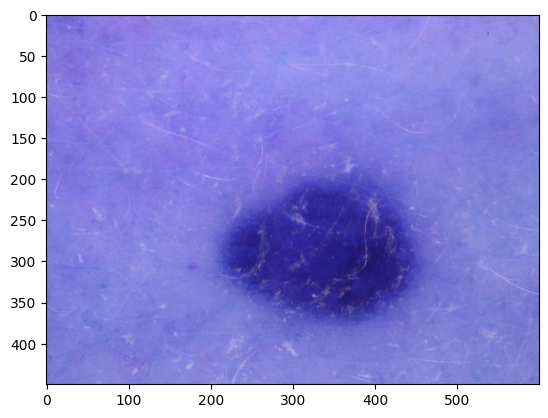

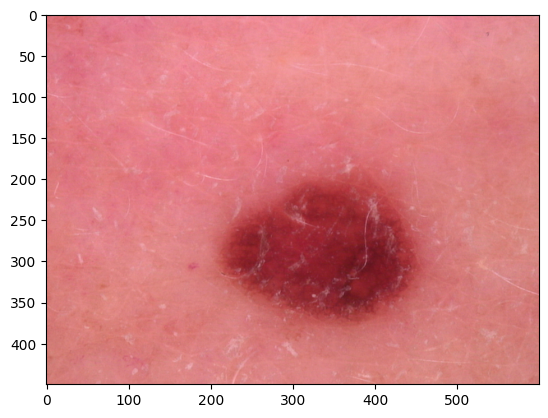

In [8]:
plt.imshow(image_bgr)
plt.show()

plt.imshow(image_rgb)
plt.show()

In [9]:
masks = mask_generator.generate(image_rgb)

# plt.imshow(result)
# plt.show()

In [11]:
import numpy as np
import supervision as sv
from supervision.draw.color import ColorPalette

In [12]:

detections = sv.Detections.from_sam(result)

# Define a custom color map
# we first create a custom color map by generating random RGB values for each detection. 
# Then, we pass this custom color map to the MaskAnnotator constructor using the colors parameter.
# num_detections = len(detections)
# custom_colors = np.random.randint(0, 255, size=(num_detections, 3))



In [13]:
sv.MaskAnnotator(color=ColorPalette.In)

In [11]:
from ultralytics.data.annotator import auto_annotate

In [19]:
auto_annotate(data=IMAGE_PATH)


image 1/1 /Volumes/Macintosh - Data/Test Implementations/Image Segmentation/pexels-mahesh-21063807.jpg: 480x640 2 persons, 3 cars, 2 traffic lights, 641.4ms
Speed: 3.6ms preprocess, 641.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


In [15]:
IMAGE_PATH

'./data/HAM10000_images_part_1/ISIC_0029283.jpg'

In [27]:
# load the model and the weights

import torch
from segment_anything import sam_model_registry

# DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = './sam_vit_h_4b8939.pth'

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)

In [28]:
# load the image you want to segment

IMAGE_PATH = './pexels-mahesh-21063807.jpg'

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [29]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

In [30]:
masks = mask_generator.generate(image_rgb)

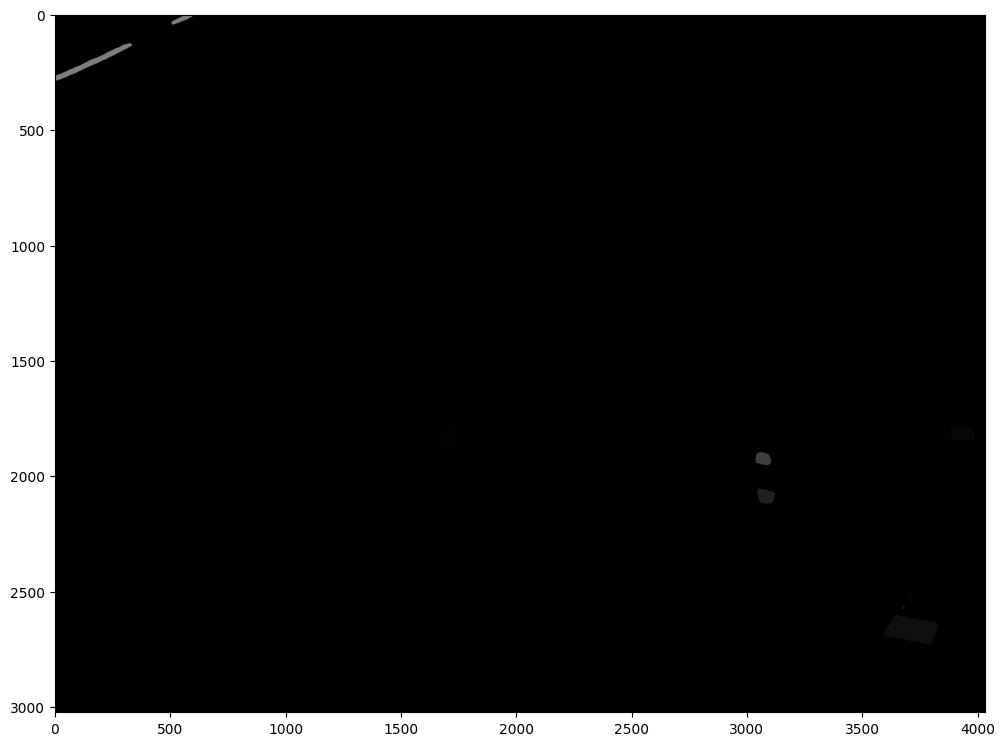

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
for mask in masks:
    plt.imshow(mask['segmentation'], alpha=0.5, cmap='gray')
plt.show()

In [41]:
len(masks)

96

In [45]:
masks[0]['segmentation']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [47]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

ValueError: not enough values to unpack (expected 2, got 1)

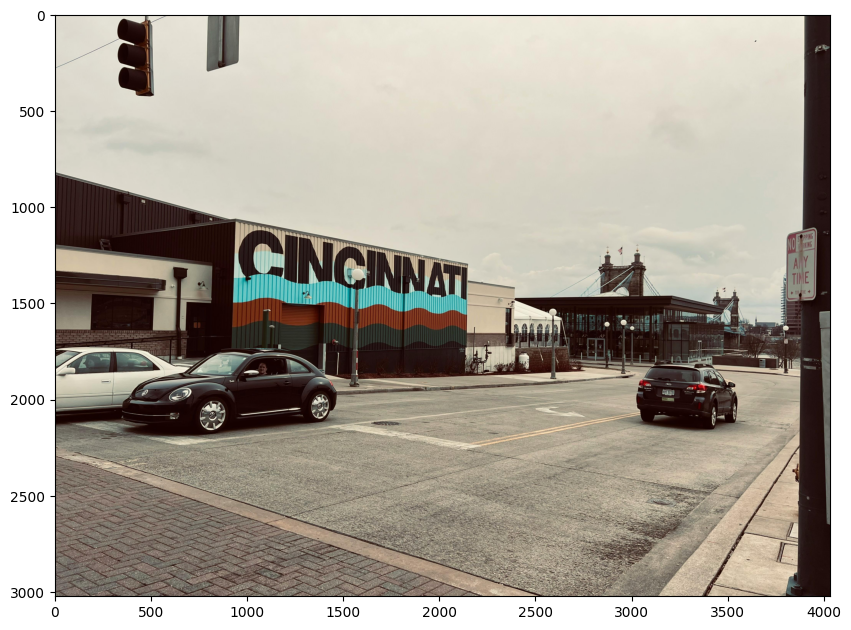

In [49]:
input_point = np.array([[500, 375]]) #truck.jpg promt point
input_label = np.array([1])

for i, mask in enumerate(masks[0]['segmentation']):
    plt.figure(figsize=(10,10))
    plt.imshow(image_rgb)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}", fontsize=18)
    plt.axis('off')
    plt.show()